In [6]:
%matplotlib inline
import networkx as nx
import math
from matplotlib import pyplot as plt
from collections import deque
from heapq import heappop, heappush
from math import *

In [7]:
# Stack
class Stack:
    def __init__(self):
        self.data = deque()

    def __len__(self):
        # print("calculating stack length")
        return len(self.data)
        
    def push(self, item):
        self.data.append(item)

    def pop(self):
        return self.data.pop()

In [8]:
# Queue fifo
class Queue:
    def __init__(self):
        self.data = deque()

    def __len__(self):
        # print("calculating Queue length")
        return len(self.data)

    def push(self, item):
        self.data.append(item)

    def pop(self):
        return self.data.popleft()

In [9]:
# Priority Queue fifo
class PriorityQueue:
    def __init__(self):
        self.data = []

    def __len__(self):
        # print("calculating PQ length")
        return len(self.data)

    def push(self, item):
        heappush(self.data, item)

    def pop(self):
        return heappop(self.data)

In [2]:
def search_algo(graph, start_node, algo='Priority Queue', goal='9'):
    visited = set()
    # queue = [start.node]
    
    # use queue, stack or heap based on chosen algorithm
    if algo == 'BFS':
        q = deque()
        popfunction = q.popleft # FIFO queue
        addfunction = q.append 
    elif algo == 'DFS':
        q = deque()
        popfunction = q.pop # LIFO stack
        addfunction = q.append
    elif algo == 'Priority Queue':
        q = [] # heapq does not work with deque() ---> has to be a list
        popfunction = lambda: heappop(q)[1]  # Extract node with lowest cost
        addfunction = lambda node, cost: heappush(q, (cost, node))
        addfunction(start_node, 0)  # Start with cost 0
    else:
        raise ValueError("Unknown algorithm")

    if algo != 'Priority Queue':
        q.append(start_node)
    
    while len(q) > 0:
        node = popfunction()
        visited.add(node)

        print(node)
        
        if node == goal:
            print('The target has been reached!')
            break
        else:
            for _, edge in graph.edges(node):  # `_` is node itself, we take neighbor
                if edge not in visited:
                    weight = graph[node][edge].get("weight", 1)
                    if algo == 'Priority Queue':
                        addfunction(edge, weight)  # Push neighbor with priority cost
                    else:
                        addfunction(edge)

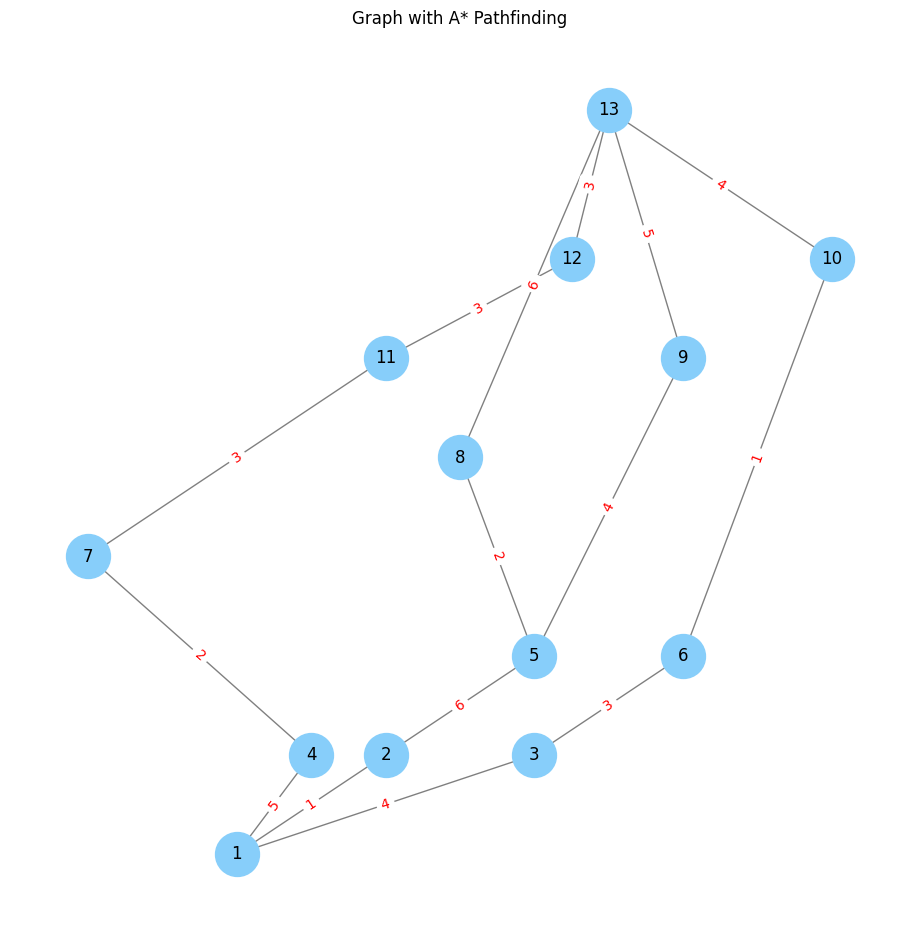

In [3]:
# Create Graph
graph = nx.Graph()

# Define edges with weights
edges = [
    ('1', '2', 1), ('1', '3', 4), ('1', '4', 5),
    ('2', '5', 6),
    ('3', '6', 3),
    ('4', '7', 2),
    ('5', '8', 2), ('5', '9', 4),
    ('6', '10', 1),
    ('7', '11', 3), 
    ('8', '13', 6),
    ('9', '13', 5),
    ('10', '13', 4),
    ('11', '12', 3),
    ('12', '13',  3),
        
]

# Add edges with weights
graph.add_weighted_edges_from(edges)

# Define node positions for Euclidean heuristic
positions = {
    '1': (0, 0), '2': (1, 1), '3': (2, 1), '4': (0.5, 1),
    '5': (2, 2), '6': (3, 2), '7': (-1, 3),
    '8': (1.5, 4), '9': (3, 5), '10': (4, 6), '11': (1, 5),
    '12': (2.25, 6), '13': (2.5,7.5) 
}

nx.set_node_attributes(graph, positions, "position")

# Draw graph
plt.figure(figsize=(9, 9))
pos = positions  # Use predefined positions for nodes
nx.draw(graph, pos, with_labels=True, node_color="lightskyblue", edge_color="gray", node_size=1000, font_size=12)
edge_labels = nx.get_edge_attributes(graph, "weight")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10, font_color="red")
plt.title("Graph with A* Pathfinding")
plt.show()